In [20]:
import pandas as pd
data = pd.read_csv('new_result/all_concat.csv')
data = data.drop(columns=['Unnamed: 0'])
data['date'] = pd.to_datetime(data['date'])
data

,date,review,rating,title,platform,thumbs_up_count,review_version,app_version,app
0,2023-02-16 16:47:48,"Fantastic app, it changed my way to workout in...",5,"Amazing app, some improvements needed",AppStore,NaN,NaN,NaN,duoswim
1,2023-12-01 18:08:43,Brilliant app which not only looks great but w...,5,Highly recommend,AppStore,NaN,NaN,NaN,duoswim
2,2023-01-14 18:32:17,Positive: The coaching side seems ok and decen...,2,"Watch app is very limited, integration apple f...",AppStore,NaN,NaN,NaN,duoswim
3,2022-06-12 10:13:29,Finally a swim app that looks great and provid...,5,A brilliant app,AppStore,NaN,NaN,NaN,duoswim
4,2022-06-11 19:02:41,This app is very easy to use. I love how you c...,5,Great for all swimmers!,AppStore,NaN,NaN,NaN,duoswim
...,...,...,...,...,...,...,...,...,...
1910,2020-02-17 07:20:49,"Great app! Simple as it is, works good for beg...",5,Easy-peasy app,AppStore,NaN,NaN,NaN,swimup
1911,2023-05-04 14:25:04,They put me on 2 levels before champion but th...,2,Honest oppinion of a 17 year old on a swim team,AppStore,NaN,NaN,NaN,swimup
1912,2021-10-04 01:08:58,Thank you guys. Appreciate your work.,5,Great App.,AppStore,NaN,NaN,NaN,swimup
1913,2021-08-01 05:34:55,I love Swimup’s YouTube channel so I was reall...,3,"I really want to like the app, I really do",AppStore,NaN,NaN,NaN,swimup


In [36]:
from textblob import TextBlob
import pandas as pd

# 确保 'rating' 列是数值格式
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# 移除无效评分的行
data = data.dropna(subset=['rating'])

# 计算评论的情感得分
data['review'] = data['review'].astype(str)  # 确保所有评论都是字符串类型
data['sentiment'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['subjectivity'] = data['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [35]:
# review_trends = data.groupby(['app', data['date'].dt.to_period('M')]).size().unstack().fillna(0)

# # Plot the review trends over time
# plt.figure(figsize=(14, 8))
# review_trends.plot(kind='line')
# plt.title('Review Trends Over Time for Different Swimming Training Apps')
# plt.xlabel('Date')
# plt.ylabel('Number of Reviews')
# plt.legend(title='App')
# plt.xticks(rotation=45)  # Rotate date labels for better readability
# plt.show()

<Figure size 1200x800 with 0 Axes>

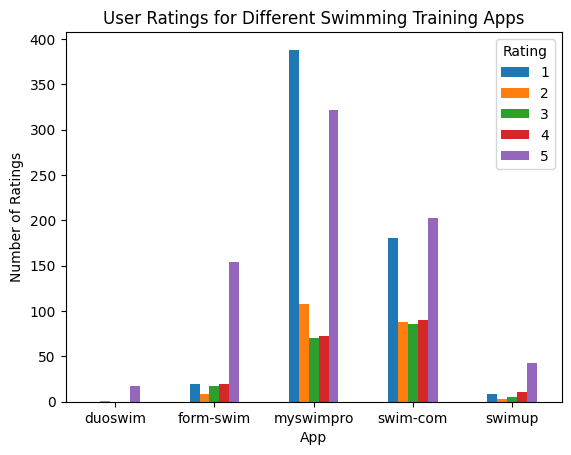

<Figure size 1200x800 with 0 Axes>

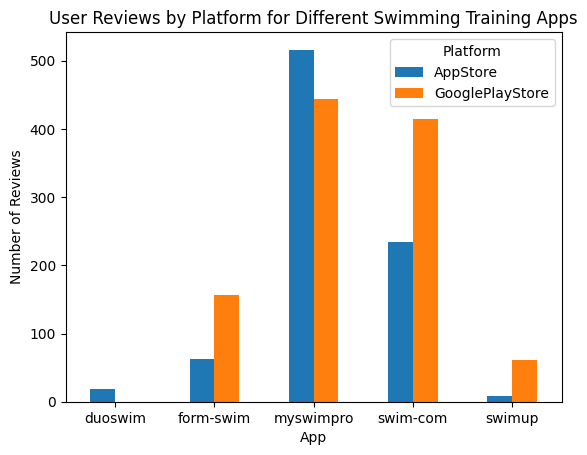

In [34]:
import matplotlib.pyplot as plt
# Adjust the previous plots to ensure the app names are horizontal

rating_counts = data.groupby(['app', 'rating']).size().unstack().fillna(0)

# Plot the rating counts with horizontal app names
plt.figure(figsize=(12, 8))
rating_counts.plot(kind='bar', stacked=False)
plt.title('User Ratings for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Number of Ratings')
plt.legend(title='Rating')
plt.xticks(rotation=0)  # Ensure app names are horizontal
plt.show()


platform_counts = data.groupby(['app', 'platform']).size().unstack().fillna(0)

# Plot the review counts by app and platform with horizontal app names
plt.figure(figsize=(12, 8))
platform_counts.plot(kind='bar', stacked=False)
plt.title('User Reviews by Platform for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.legend(title='Platform')
plt.xticks(rotation=0)  # Ensure app names are horizontal
plt.show()


<Figure size 1200x800 with 0 Axes>

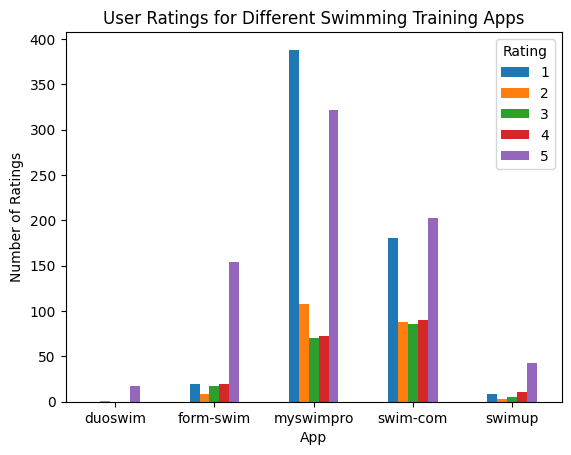

<Figure size 1200x800 with 0 Axes>

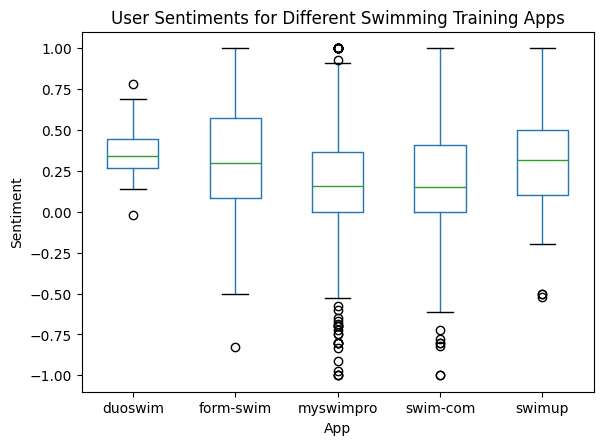

<Figure size 1200x800 with 0 Axes>

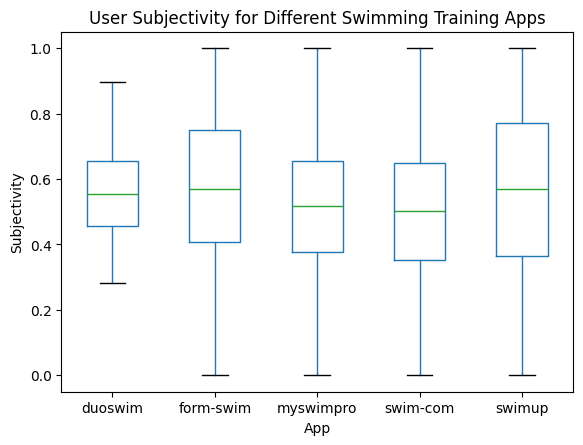

<Figure size 1200x800 with 0 Axes>

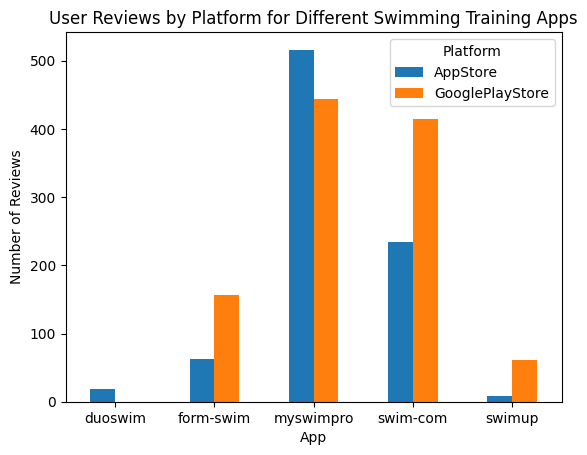

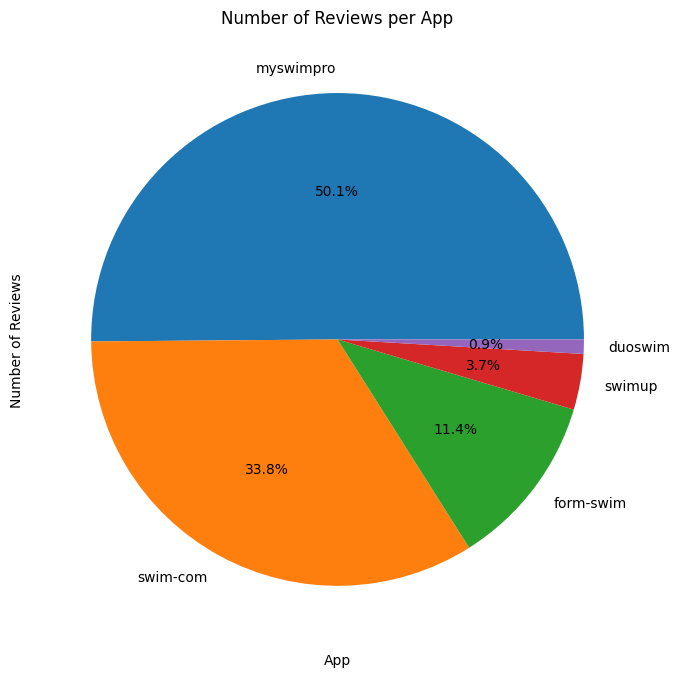

In [49]:
import matplotlib.pyplot as plt 

# 1. 评分分布按应用程序
rating_counts = data.groupby(['app', 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
rating_counts.plot(kind='bar', stacked=False)
plt.title('User Ratings for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Number of Ratings')
plt.legend(title='Rating')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
# plt.savefig('Rating_Distribution_by_App.png')
plt.show()

# 2. 情感分布按应用程序 - 箱线图
plt.figure(figsize=(12, 8))
data.boxplot(column='sentiment', by='app', grid=False)
plt.title('User Sentiments for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Sentiment')
plt.suptitle('')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
# plt.savefig('Polarity_Distribution_by_App.png')
plt.show()

# 3. 主观性分布按应用程序 - 箱线图
plt.figure(figsize=(12, 8))
data.boxplot(column='subjectivity', by='app', grid=False)
plt.title('User Subjectivity for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Subjectivity')
plt.suptitle('')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
# plt.savefig('Subjectivity_Distribution_by_App.png')
plt.show()

# 4. 平台评论数量分布按应用程序
platform_counts = data.groupby(['app', 'platform']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
platform_counts.plot(kind='bar', stacked=False)
plt.title('User Reviews by Platform for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.legend(title='Platform')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
# plt.savefig('Platform_Reviews_Distribution_by_App.png')
plt.show()

# 5. 每个应用的评论数量
app_counts = data['app'].value_counts()

plt.figure(figsize=(12, 8))
app_counts.plot(kind='pie', stacked=False, autopct='%1.1f%%')
plt.title('Number of Reviews per App')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
# plt.savefig('Number_of_Reviews_per_App.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

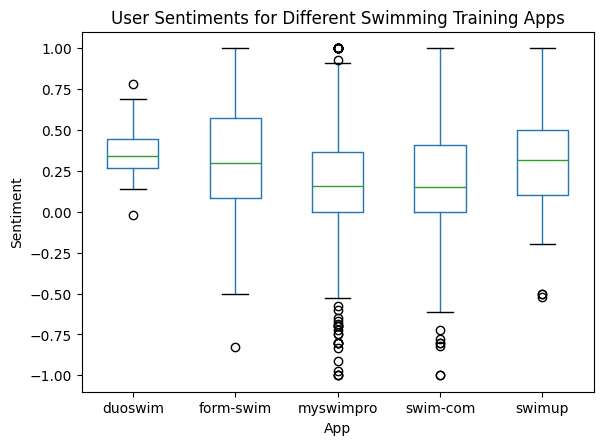

In [48]:
# 2. 情感分布按应用程序 - 箱线图
plt.figure(figsize=(12, 8))
data.boxplot(column='sentiment', by='app', grid=False)
plt.title('User Sentiments for Different Swimming Training Apps')
plt.xlabel('App')
plt.ylabel('Sentiment')
plt.suptitle('')
plt.xticks(rotation=0)  # 确保应用程序名称是水平的
plt.savefig('Polarity_Distribution_by_App.png')
plt.show()